# Les principes SOLIDE

Dans ce guide, nous continuerons à explorer les concepts de conception propre appliqués à Python. En particulier, nous passerons en revue les principes SOLID et comment les implémenter de manière Pythonic. Ces principes impliquent une série de bonnes pratiques pour obtenir des logiciels de meilleure qualité. Au cas où certains d'entre vous ne sauraient pas ce que signifie SOLID, le voici

* S : (Single responsibility principle) Principe de responsabilité unique
* O : (Open/closed principle) Principe ouvert/fermé
* L : (Liskov's substitution principle) Principe de substitution de Liskov
* I : (Interface segregation principle)  Principe de ségrégation d'interface
* D : (Dependency inversion principle) Principe d'inversion de dépendance


## Le principe de responsabilité unique

Le principe de responsabilité unique (SRP) stipule qu'un composant logiciel (en général, une classe) ne doit avoir qu'une seule responsabilité. Le fait que la classe ait une responsabilité unique signifie qu'elle n'est chargée de faire qu'une seule chose concrète, et par conséquent, nous pouvons conclure qu'elle ne doit avoir qu'une seule raison de changer.

Ce n'est que si une chose sur le problème de domaine change que la classe devra être mise à jour. Si nous devons apporter des modifications à une classe pour différentes raisons, cela signifie que l'abstraction est incorrecte et que la classe a trop de responsabilités. C'est probablement une indication qu'il manque au moins une abstraction : plus d'objets doivent être créés pour répondre à la responsabilité supplémentaire qui surcharge la classe actuelle en question.


Comme présenté dans le guide 1, Pythonic Code, ce principe de conception nous aide à construire des abstractions plus cohérentes—des objets qui font une chose, et une seule chose, eh bien, en suivant la philosophie Unix. Ce que nous voulons éviter dans tous les cas, c'est d'avoir des objets avec des responsabilités multiples (souvent appelés objets de Dieu, car ils en savent trop, ou plus qu'ils ne devraient). Ces objets regroupent des comportements différents (pour la plupart sans rapport), ce qui les rend plus difficiles à maintenir. Encore une fois, plus la classe est petite, mieux c'est.

Le SRP est étroitement lié à l'idée de cohésion dans la conception logicielle, que nous avons déjà explorée au guide 2, Caractéristiques générales du bon code, lorsque nous avons discuté de la séparation des préoccupations dans le logiciel. Ce que nous nous efforçons de réaliser ici, c'est que les classes soient conçues de telle manière que la plupart de leurs propriétés et de leurs attributs soient utilisés par leurs méthodes, la plupart du temps. Lorsque cela se produit, nous savons qu'il s'agit de concepts liés, et il est donc logique de les regrouper sous la même abstraction.

D'une certaine manière, cette idée est quelque peu analogue au concept de normalisation dans la conception de bases de données relationnelles. Lorsque nous détectons qu'il y a des partitions sur les attributs ou les méthodes de l'interface d'un objet, elles pourraient aussi bien être déplacées ailleurs - c'est un signe qu'il s'agit de deux ou plusieurs abstractions différentes mélangées en une seule.

Il y a une autre façon de voir ce principe. Si, en examinant une classe, nous trouvons des méthodes qui s'excluent mutuellement et ne sont pas liées les unes aux autres, ce sont les différentes responsabilités qui doivent être décomposées en classes plus petites.






## Une classe avec trop de responsabilités

Dans cet exemple, nous allons créer un cas pour une application chargée de lire des informations sur les événements à partir d'une source (cela peut être des fichiers journaux, une base de données ou bien d'autres sources), et identifier les actions correspondant à chaque journal particulier.

Une conception qui ne se conforme pas au SRP ressemblerait à ceci

| SystemMonitor  |
|:-:|
|+ load_activity   |
|+ identify_events|
|+ stream_events|

In [ ]:
class SystemMonitor:
    def load_activity(self):
        """Get the events from a source, to be processed."""

    def identify_events(self):
        """Parse the source raw data into events (domain objects)."""

    def stream_events(self):
        """Send the parsed events to an external agent."""

Le problème avec cette classe est qu'elle définit une interface avec un ensemble de méthodes qui correspondent à des actions qui sont orthogonales : chacune peut se faire indépendamment des autres.

Ce défaut de conception rend la classe rigide, inflexible et sujette aux erreurs car elle est difficile à maintenir. Dans cet exemple, chaque méthode représente une responsabilité de la classe. Chaque responsabilité implique une raison pour laquelle la classe pourrait avoir besoin d'être modifiée. Dans ce cas, chaque méthode représente une des différentes raisons pour lesquelles la classe devra être modiée.

Considérez la méthode loader, qui récupère les informations d'une source particulière. Quelle que soit la manière dont cela est fait (nous pouvons faire abstraction des détails de l'implémentation ici), il aura sa propre séquence d'étapes, par exemple, se connecter à la source de données, charger les données, les analyser dans le format attendu, etc. Si nous devons changer quelque chose (par exemple, nous voulons changer la structure de données utilisée pour contenir les données), la classe SystemMonitor devra changer. Demandez-vous si cela a du sens. Un objet de moniteur système doit-il changer parce que nous avons modifié la représentation des données ? Non

Le même raisonnement s'applique aux deux autres méthodes. Si nous modifions la façon dont nous imprimons les événements ou comment nous les transmettons à une autre source de données, nous finissons par apporter des modifications à la même classe.


Il devrait être clair maintenant que cette classe est plutôt fragile et peu maintenable. Il y a beaucoup de raisons différentes qui auront un impact sur les changements dans cette classe. Au lieu de cela, nous voulons que les facteurs externes impactent notre code le moins possible. La solution, encore une fois, est de créer des abstractions plus petites et plus cohérentes

## Répartition des responsabilités

Pour rendre la solution plus maintenable, nous séparons chaque méthode dans une classe différente. De cette façon, chaque classe aura une responsabilité unique

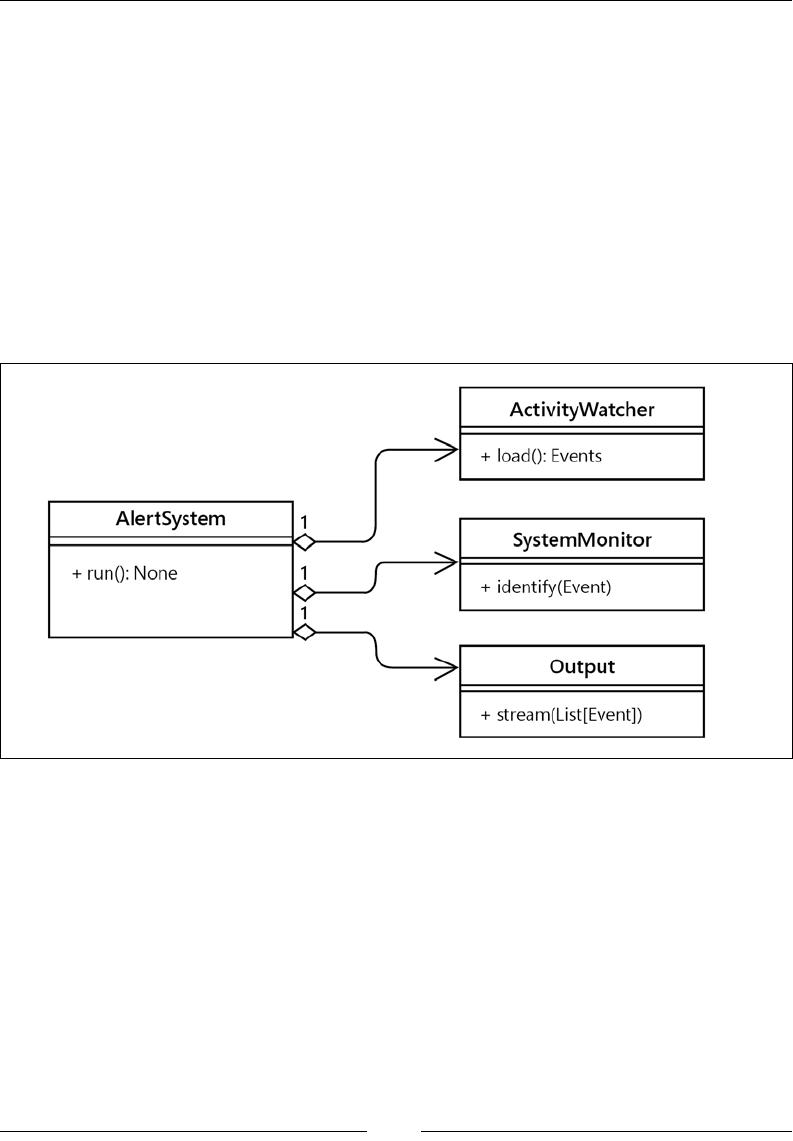

Le même comportement est obtenu en utilisant un objet qui interagit avec les instances de ces nouvelles classes, en utilisant ces objets comme collaborateurs, mais l'idée demeure que chaque classe encapsule un ensemble spécifique de méthodes indépendantes des autres. L'idée est maintenant que les modifications apportées à l'une de ces classes n'ont pas d'impact sur le reste, et toutes ont une signification claire et spécique. Si nous devons changer quelque chose dans la façon dont nous chargeons les événements à partir des sources de données, le système d'alerte n'est même pas au courant de ces changements, nous n'avons donc rien à modifier sur le moniteur système (tant que le contrat est toujours conservé), et la cible de données est également non modiée.

Les changements sont désormais locaux, l'impact est minime et chaque classe est plus facile à maintenir.

Les nouvelles classes dénissent des interfaces qui sont non seulement plus maintenables mais aussi réutilisables. Imaginez que maintenant, dans une autre partie de l'application, nous devons également lire l'activité dans les journaux, mais à des fins différentes. Avec cette conception, nous pouvons simplement utiliser des objets de type ActivityWatcher (qui serait en fait une interface, mais pour les besoins de cette section, ce détail n'est pas pertinent et sera expliqué plus tard pour les prochains principes). Cela aurait du sens, alors que cela n'aurait pas eu de sens dans la conception précédente, car les tentatives de réutilisation de la seule classe que nous avions auraient également porté des méthodes supplémentaires (que identifier_events() ou stream_events()) qui n'étaient pas nécessaires du tout.

Une précision importante est que le principe ne veut pas du tout dire que chaque classe doit avoir une seule méthode. N'importe laquelle des nouvelles classes peut avoir des méthodes supplémentaires, tant qu'elles correspondent à la même logique que cette classe.

Une observation intéressante de la plupart (sinon de tous) des principes que nous explorons dans ce chapitre est que nous ne devrions pas essayer de les comprendre dès la première conception. L'idée est de concevoir des logiciels qui peuvent être facilement étendus et modifiés, et qui peuvent évoluer vers une version plus stable.

En particulier, vous pouvez utiliser le SRP comme un processus de réflexion. Par exemple, si vous concevez un composant (disons une classe), et qu'il y a beaucoup de choses différentes à faire (comme dans l'exemple précédent), dès le début vous pouvez anticiper que cela ne finira pas bien, et que vous devez séparer les responsabilités. C'est un bon début, mais la question est alors : quelles sont les bonnes limites pour séparer les responsabilités ? Donc, pour comprendre cela, vous pouvez commencer à rédiger un cours monolithique, afin de comprendre quelles sont les collaborations internes et comment les responsabilités sont réparties. Cela vous aidera à obtenir une image plus claire des nouvelles abstractions qui doivent être créées.

## Le principe ouvert/fermé

Le principe ouvert/fermé (OCP) stipule qu'un module doit être à la fois ouvert et fermé (mais par rapport à différents aspects).

Lors de la conception d'une classe, par exemple, nous devons soigneusement encapsuler les détails de l'implémentation, afin qu'elle ait une bonne maintenance, ce qui signifie que nous voulons qu'elle soit ouverte à l'extension mais fermée à la modification.

Ce que cela signifie en termes simples, c'est que, bien sûr, nous voulons que notre code soit extensible, qu'il s'adapte aux nouvelles exigences ou aux changements dans le problème du domaine. Cela signifie que lorsque quelque chose de nouveau apparaît sur le problème de domaine, nous voulons seulement ajouter de nouvelles choses à notre modèle, ne rien changer d'existant qui est fermé à la modification.

si pour une raison quelconque, lorsque quelque chose de nouveau doit être ajouté, nous nous retrouvons à modifier le code, alors cette logique est probablement mal conçue. Idéalement, lorsque les exigences changent, nous voulons simplement avoir à étendre le module avec le nouveau comportement, mais sans avoir à modifier de manière significative la logique actuelle. Ce principe s'applique à plusieurs abstractions logicielles. Il peut s'agir d'une classe ou même d'un module dont nous parlons, mais l'idée reste la même. Nous verrons des exemples de chacun dans les deux sous-sections suivantes

## Exemple de périls de maintenabilité pour ne pas suivre l'OCP

Commençons par un exemple de système conçu de manière à ne pas suivre l'OCP, afin de voir les problèmes de maintenabilité que cela entraîne et l'inflexibilité d'une telle conception.

L'idée est que nous avons une partie du système qui est chargée d'identifier les événements au fur et à mesure qu'ils se produisent dans un autre système, qui est surveillé. À chaque point, nous voulons que ce composant identifie le type d'événement, correctement, selon les valeurs des données qui ont été précédemment recueillies (pour simplifier, nous supposerons qu'il est empaqueté dans un dictionnaire, et a été précédemment récupéré par un autre moyen tel que comme les journaux, les requêtes et bien d'autres). Nous avons une classe qui, sur la base de ces données, récupérera l'événement, qui est un autre type avec sa propre hiérarchie.

À partir du diagramme de classes suivant, nous voyons un objet qui fonctionne avec une interface (une classe de base, avec plusieurs sous-classes pouvant être utilisées de manière polymorphe)

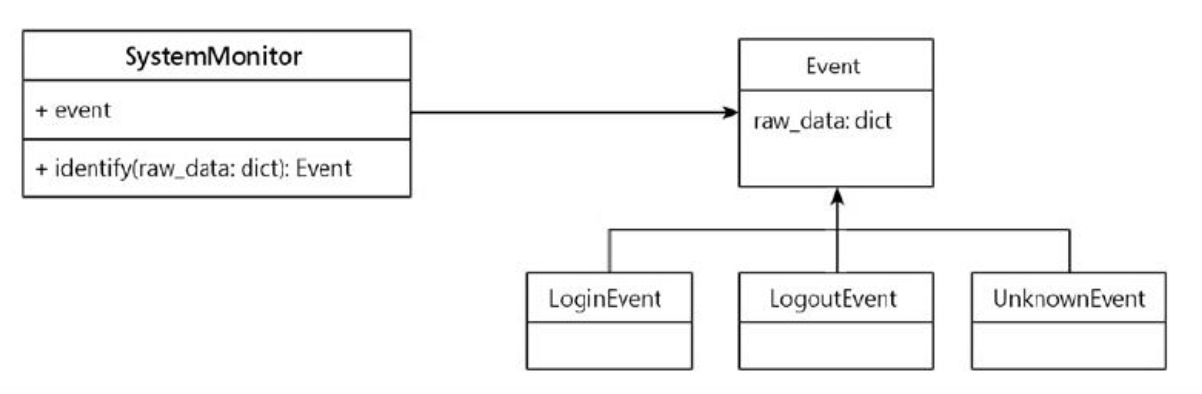

À première vue, cela peut ressembler à une conception extensible : l'ajout d'un nouvel événement consisterait à créer une nouvelle sous-classe d'événement, puis le moniteur système devrait pouvoir travailler avec eux. Cependant, ce n'est pas tout à fait exact, car tout dépend de l'implémentation réelle dans la méthode utilisée dans la classe de moniteur système

In [ ]:
from dataclasses import dataclass


@dataclass
class Event:
    raw_data: dict


class UnknownEvent(Event):
    """A type of event that cannot be identified from its data."""


class LoginEvent(Event):
    """A event representing a user that has just entered the system."""


class LogoutEvent(Event):
    """An event representing a user that has just left the system."""


class SystemMonitor:
    """Identify events that occurred in the system
    >>> l1 = SystemMonitor({"before": {"session": 0}, "after": {"session": 1}})
    >>> l1.identify_event().__class__.__name__
    'LoginEvent'
    >>> l2 = SystemMonitor({"before": {"session": 1}, "after": {"session": 0}})
    >>> l2.identify_event().__class__.__name__
    'LogoutEvent'
    >>> l3 = SystemMonitor({"before": {"session": 1}, "after": {"session": 1}})
    >>> l3.identify_event().__class__.__name__
    'UnknownEvent'
    """

    def __init__(self, event_data):
        self.event_data = event_data

    def identify_event(self):
        if (
            self.event_data["before"]["session"] == 0
            and self.event_data["after"]["session"] == 1
        ):
            return LoginEvent(self.event_data)
        elif (
            self.event_data["before"]["session"] == 1
            and self.event_data["after"]["session"] == 0
        ):
            return LogoutEvent(self.event_data)

        return UnknownEvent(self.event_data)

In [ ]:
l1 = SystemMonitor({"before": {"session": 0}, "after": {"session": 1}})

In [ ]:
l1.identify_event().__class__.__name__

'LoginEvent'

In [ ]:
l2 = SystemMonitor({"before": {"session": 1}, "after": {"session": 0}})
l2.identify_event().__class__.__name__

'LogoutEvent'

In [ ]:
l3 = SystemMonitor({"before": {"session": 1}, "after": {"session": 1}})
l3.identify_event().__class__.__name__

'UnknownEvent'

Notez la hiérarchie des types d'événements et une certaine logique métier pour les construire. Par exemple, lorsqu'il n'y avait pas d'indicateur précédent pour une session, mais qu'il y en a maintenant, nous identifions cet enregistrement comme un événement de connexion. Inversement, lorsque l'inverse se produit, cela signifie qu'il s'agissait d'un événement de déconnexion. S'il n'a pas été possible d'identifier un événement, un événement de type inconnu est renvoyé. Il s'agit de préserver le polymorphisme en suivant le modèle d'objet nul (au lieu de renvoyer None, il récupère un objet du type correspondant avec une logique par défaut).

Cette conception a quelques problèmes. Le premier problème est que la logique de détermination des types d'événements est centralisée à l'intérieur d'une méthode monolithique. Au fur et à mesure que le nombre d'événements que nous voulons prendre en charge augmente, cette méthode le fera également, et elle pourrait finir par être une méthode très longue, ce qui est mauvais car, comme nous l'avons déjà discuté, elle ne fera pas qu'une seule chose et une seule chose bien.

Sur la même ligne, nous pouvons voir que cette méthode n'est pas fermée à la modication. Chaque fois que nous voulons ajouter un nouveau type d'événement au système, nous devrons changer quelque chose dans cette méthode (sans compter que la chaîne d'instructions elif sera un cauchemar à lire !)

Nous voulons pouvoir ajouter de nouveaux types d'événements sans avoir à changer cette méthode (fermée pour modification). Nous voulons également pouvoir prendre en charge de nouveaux types d'événements (ouverts pour extension) afin que lorsqu'un nouvel événement est ajouté, nous n'ayons qu'à ajouter du code, pas à modifier le code qui existe déjà

## Refactorisation du système d'événements pour l'extensibilité

Le problème avec l'exemple précédent était que la classe SystemMonitor interagissait directement avec les classes concrètes qu'elle allait récupérer.

Afin de parvenir à un design qui respecte le principe ouvert/fermé, nous devons concevoir vers des abstractions.

Une alternative possible serait de penser à cette classe comme elle collabore avec les événements, puis nous déléguons la logique pour chaque type particulier d'événement à sa classe correspondante : 

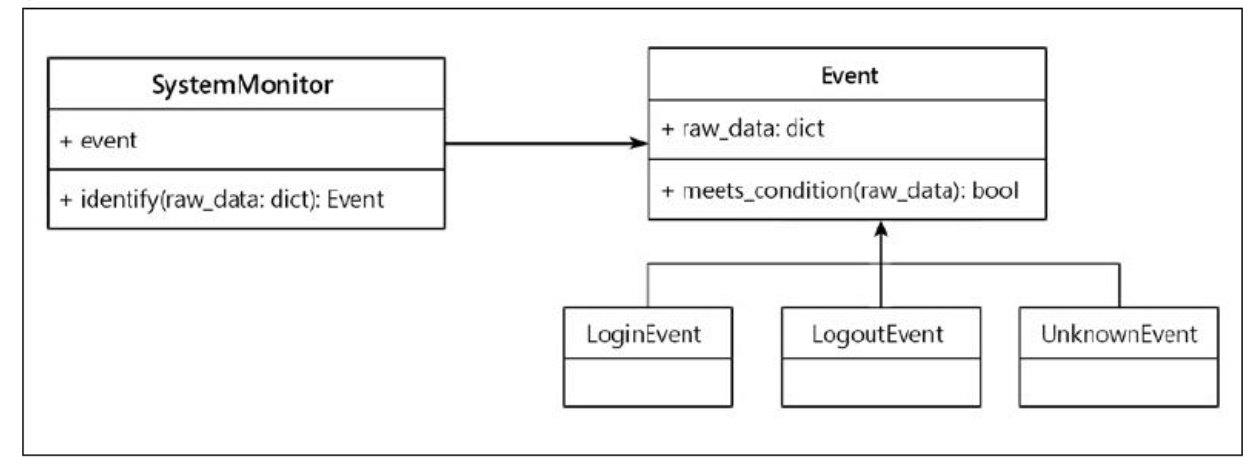

Ensuite, nous devons ajouter une nouvelle méthode (polymorphe) à chaque type d'événement avec la seule responsabilité de déterminer s'il correspond aux données transmises ou non, et nous devons également changer la logique pour parcourir tous les événements, en trouvant le le bon. Le nouveau code devrait ressembler à ceci

In [ ]:
from dataclasses import dataclass


@dataclass
class Event:
    raw_data: dict

    @staticmethod
    def meets_condition(event_data: dict) -> bool:
        return False


class UnknownEvent(Event):
    """A type of event that cannot be identified from its data"""


class LoginEvent(Event):
    @staticmethod
    def meets_condition(event_data: dict):
        return (
            event_data["before"]["session"] == 0
            and event_data["after"]["session"] == 1
        )


class LogoutEvent(Event):
    @staticmethod
    def meets_condition(event_data: dict):
        return (
            event_data["before"]["session"] == 1
            and event_data["after"]["session"] == 0
        )


class SystemMonitor:
    """Identify events that occurred in the system
    >>> l1 = SystemMonitor({"before": {"session": 0}, "after": {"session": 1}})
    >>> l1.identify_event().__class__.__name__
    'LoginEvent'
    >>> l2 = SystemMonitor({"before": {"session": 1}, "after": {"session": 0}})
    >>> l2.identify_event().__class__.__name__
    'LogoutEvent'
    >>> l3 = SystemMonitor({"before": {"session": 1}, "after": {"session": 1}})
    >>> l3.identify_event().__class__.__name__
    'UnknownEvent'
    """

    def __init__(self, event_data):
        self.event_data = event_data

    def identify_event(self):
        for event_cls in Event.__subclasses__():
            try:
                if event_cls.meets_condition(self.event_data):
                    return event_cls(self.event_data)
            except KeyError:
                continue
        return UnknownEvent(self.event_data)

Remarquez comment l'interaction est maintenant orientée vers une abstraction (dans ce cas, ce serait la classe de base générique Event, qui pourrait même être une classe de base abstraite ou une interface, mais pour les besoins de cet exemple, il suffit d'avoir un classe de base). La méthode ne fonctionne plus avec des types d'événements spécifiques, mais uniquement avec des événements génériques qui suivent une interface commune - ils sont tous polymorphes par rapport à la méthode meet_condition

Remarquez comment les événements sont découverts via la méthode __subclasses__(). La prise en charge de nouveaux types d'événements consiste maintenant simplement à créer une nouvelle classe pour cet événement qui doit étendre Event et implémenter sa propre méthode meets_condition(), selon ses critères particuliers

Cet exemple repose sur la méthode __subclasses__(), car elle suffit à illustrer l'idée d'un design extensible. D'autres alternatives peuvent également être utilisées, telles que l'enregistrement de classes à l'aide du module abc ou la création de notre propre registre, mais l'idée principale est la même et la relation entre les objets ne changerait pas.

Avec cette conception, la méthode origin_event est fermée : elle n'a pas besoin d'être modifiée lorsque nous ajoutons un nouveau type d'événement à notre domaine. A l'inverse, la hiérarchie des événements est ouverte à l'extension : lorsqu'un nouvel événement apparaît dans le domaine, il suffit de créer une nouvelle entité et de définir ses critères en fonction de l'interface qu'elle implémente.

## Extension du système d'événements

Maintenant, prouvons que cette conception est en fait aussi extensible que nous le voulions. Imaginez qu'une nouvelle exigence se présente, et nous devons également prendre en charge les événements qui correspondent aux transactions que l'utilisateur a exécutées sur le système surveillé. Le diagramme de classes pour la conception doit inclure ce nouveau type d'événement, comme indiqué ici 

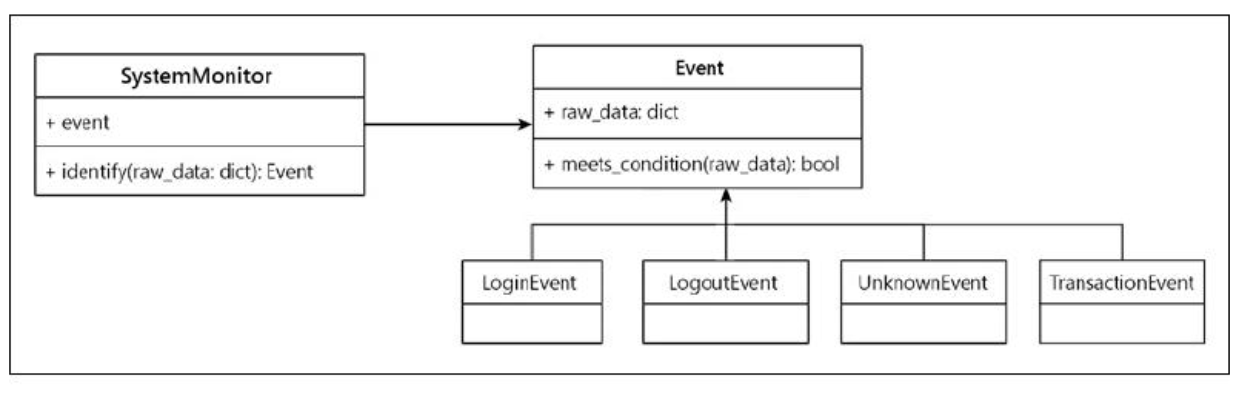

Nous créons la nouvelle classe, implémentons les critères sur sa méthode meet_condition, et le reste de la logique devrait continuer à fonctionner comme avant (avec le nouveau comportement inclus)

En supposant que toutes les autres définitions précédentes ne changent pas, voici le code de la nouvelle classe

In [ ]:
from dataclasses import dataclass


@dataclass
class Event:
    raw_data: dict

    @staticmethod
    def meets_condition(event_data: dict):
        return False


class UnknownEvent(Event):
    """A type of event that cannot be identified from its data"""


class LoginEvent(Event):
    @staticmethod
    def meets_condition(event_data: dict):
        return (
            event_data["before"]["session"] == 0
            and event_data["after"]["session"] == 1
        )


class LogoutEvent(Event):
    @staticmethod
    def meets_condition(event_data: dict):
        return (
            event_data["before"]["session"] == 1
            and event_data["after"]["session"] == 0
        )


class TransactionEvent(Event):
    """Represents a transaction that has just occurred on the system."""

    @staticmethod
    def meets_condition(event_data: dict):
        return event_data["after"].get("transaction") is not None


class SystemMonitor:
    """Identify events that occurred in the system
    >>> l1 = SystemMonitor({"before": {"session": 0}, "after": {"session": 1}})
    >>> l1.identify_event().__class__.__name__
    'LoginEvent'
    >>> l2 = SystemMonitor({"before": {"session": 1}, "after": {"session": 0}})
    >>> l2.identify_event().__class__.__name__
    'LogoutEvent'
    >>> l3 = SystemMonitor({"before": {"session": 1}, "after": {"session": 1}})
    >>> l3.identify_event().__class__.__name__
    'UnknownEvent'
    >>> l4 = SystemMonitor({"after": {"transaction": "Tx001"}})
    >>> l4.identify_event().__class__.__name__
    'TransactionEvent'
    """

    def __init__(self, event_data):
        self.event_data = event_data

    def identify_event(self):
        for event_cls in Event.__subclasses__():
            try:
                if event_cls.meets_condition(self.event_data):
                    return event_cls(self.event_data)
            except KeyError:
                continue
        return UnknownEvent(self.event_data)

Notez que la méthode SystemMonitor.identify_event() n'a pas du tout changé lorsque nous avons ajouté le nouveau type d'événement. On dit donc que cette méthode est fermée vis-à-vis de nouveaux types d'événements.

A l'inverse, la classe Event nous a permis d'ajouter un nouveau type d'événement lorsque cela nous a été demandé. On dit alors que les événements sont ouverts pour une extension par rapport à de nouveaux types

C'est la véritable essence de ce principe : quand quelque chose de nouveau apparaît sur le problème de domaine, nous voulons seulement ajouter du nouveau code, pas modifier un code existant

## Réflexions finales sur l'OCP

Comme vous l'avez peut-être remarqué, ce principe est étroitement lié à l'utilisation efficace du polymorphisme. Nous voulons travailler à la conception d'abstractions qui respectent un contrat polymorphe que le client peut utiliser, à une structure suffisamment générique pour que l'extension du modèle soit possible, tant que la relation polymorphe est préservée.

Ce principe aborde un problème important en génie logiciel : la maintenabilité. Les dangers de ne pas suivre l'OCP sont des effets d'entraînement et des problèmes dans le logiciel où un seul changement déclenche des changements dans toute la base de code, ou risque de casser d'autres parties du code.

Une note finale importante est que, afin de réaliser cette conception dans laquelle nous ne modifions pas le code pour étendre le comportement, nous devons être capables de créer une fermeture appropriée contre les abstractions que nous voulons protéger (dans cet exemple, de nouveaux types de événements). Ce n'est pas toujours possible dans tous les programmes, car certaines abstractions peuvent entrer en collision (par exemple, nous pourrions avoir une abstraction appropriée qui fournit une clôture par rapport à une exigence mais ne fonctionne pas pour d'autres types d'exigences). Dans ces cas, nous devons être sélectifs et appliquer une stratégie qui offre la meilleure clôture pour les types d'exigences qui nécessitent d'être les plus extensibles

## Le principe de substitution de Liskov

Le principe de substitution de Liskov (LSP) stipule qu'il existe une série de propriétés qu'un type d'objet doit posséder pour préserver la fiabilité de sa conception.

L'idée principale derrière LSP est que, pour n'importe quelle classe, un client devrait être capable d'utiliser n'importe lequel de ses sous-types de manière indiscernable, sans même s'en apercevoir, et donc sans compromettre le comportement attendu au moment de l'exécution. Cela signifie que les clients sont complètement isolés et ignorent les changements dans la hiérarchie des classes

Plus formellement, c'est la définition originale (LISKOV 01) de LSP : si S est un sous-type de T, alors les objets de type T peuvent être remplacés par des objets de type S, sans casser le programme

Ceci peut être compris à l'aide d'un schéma générique tel que le suivant. Imaginez qu'il existe une classe cliente qui requiert (inclut) des objets d'un autre type. De manière générale, nous voudrons que ce client interagisse avec des objets d'un certain type, à savoir qu'il fonctionnera via une interface.

Maintenant, ce type pourrait aussi bien être juste une définition d'interface générique, une classe abstraite ou une interface, pas une classe avec le comportement lui-même. Il peut y avoir plusieurs sous-classes étendant ce type (décrit dans la Figure suivante avec le nom Sous-type, jusqu'à N). L'idée derrière ce principe est que si la hiérarchie est correctement implémentée, la classe cliente doit être capable de travailler avec des instances de n'importe laquelle des sous-classes sans même s'en apercevoir. Ces objets doivent être interchangeables


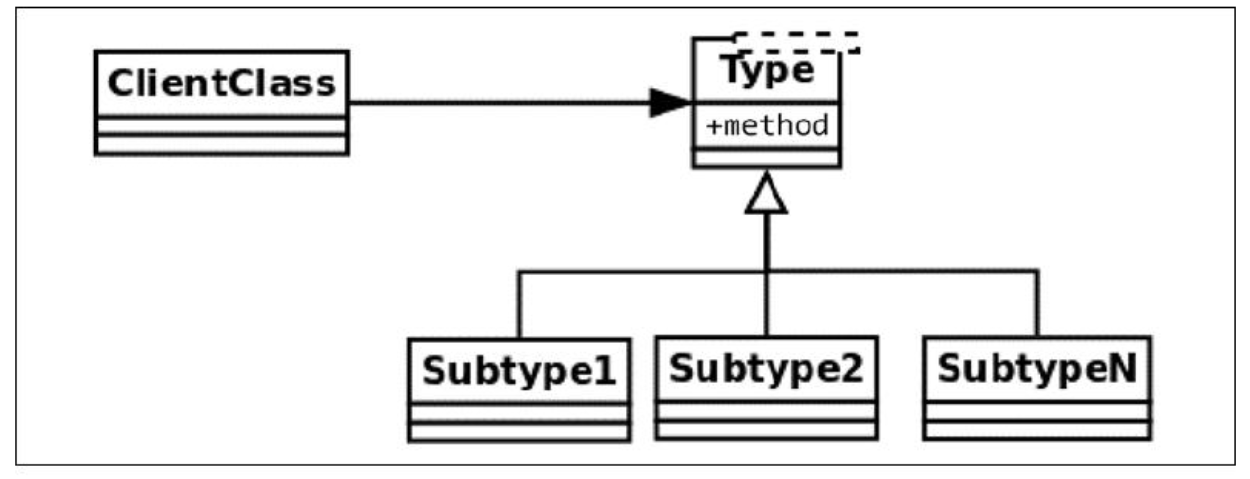

Il est lié à d'autres principes de conception que nous avons déjà visités, comme la conception d'interfaces. Une bonne classe doit définir une interface claire et concise, et tant que les sous-classes honorent cette interface, le programme restera correct.

En conséquence, le principe concerne également les idées qui sous-tendent la conception par contrat. Il existe un contrat entre un type donné et un client. En suivant les règles de LSP, la conception s'assurera que les sous-classes respectent les contrats tels qu'ils sont dénfnis par les classes parentes

## Détecter les problèmes de LSP avec des outils

Certains scénarios sont si notoirement erronés en ce qui concerne le LSP qu'ils peuvent être facilement identifiés par les outils que nous avons appris à configurer au guide, Introduction, Formatage du code et Outils (principalement mypy et pylint).

## Utiliser mypy pour détecter les signatures de méthode incorrectes

En utilisant des annotations de type (comme recommandé précédemment dans le guide, Introduction, mise en forme du code et outils), tout au long de notre code et en configurant mypy, nous pouvons rapidement détecter rapidement certaines erreurs de base et vérifier gratuitement la conformité de base avec LSP.

Si l'une des sous-classes de la classe Event devait surcharger une méthode de manière incompatible, mypy le remarquerait en inspectant les annotations



In [ ]:
class Event:
    ...

    def meets_condition(self, event_data: dict) -> bool:
        return False


class LoginEvent(Event):
    def meets_condition(self, event_data: list) -> bool:
        return bool(event_data)


class LogoutEvent(Event):
    def meets_condition(self, event_data: dict, override: bool) -> bool:
        if override:
            return True
        ...

Lorsque nous exécutons mypy sur ce fichier, nous obtenons un message d'erreur indiquant ce qui suit

    error: Argument 1 of "meets_condition" incompatible with supertype "Event"


La violation de LSP est claire : étant donné que la classe dérivée utilise un type pour le paramètre event_data différent de celui défini sur la classe de base, nous ne pouvons pas nous attendre à ce qu'ils fonctionnent de la même manière. N'oubliez pas que, selon ce principe, tout appelant de cette hiérarchie doit pouvoir travailler avec Event ou LoginEvent de manière transparente, sans remarquer de différence. L'échange d'objets de ces deux types ne doit pas faire échouer l'application. Ne pas le faire briserait le polymorphisme sur la hiérarchie.

La même erreur se serait produite si le type de retour avait été modifié pour autre chose qu'une valeur booléenne. La raison en est que les clients de ce code s'attendent à une valeur booléenne avec laquelle travailler. Si l'une des classes dérivées change ce type de retour, cela romprait le contrat, et encore une fois, nous ne pouvons pas nous attendre à ce que le programme continue de fonctionner normalement.

Une note rapide sur les types qui ne sont pas les mêmes mais partagent une interface commune : même s'il ne s'agit que d'un simple exemple pour démontrer l'erreur, il est toujours vrai que les dictionnaires et les listes ont quelque chose en commun ; ils sont tous les deux itérables. Cela signifie que dans certains cas, il peut être valable d'avoir une méthode qui attend un dictionnaire et une autre qui s'attend à recevoir une liste, tant que les deux traitent les paramètres via l'interface itérable. Dans ce cas, le problème ne résiderait pas dans la logique elle-même (LSP pourrait toujours s'appliquer), mais dans la dénition des types de signature, qui ne devrait lire ni list ni dict, mais une union des deux. Quel que soit le cas, quelque chose doit être modié, que ce soit le code de la méthode, la conception entière ou simplement les annotations de type, mais nous ne devons en aucun cas faire taire l'avertissement et ignorer l'erreur donnée par mypy.

Ce principe est également logique du point de vue de la conception orientée objet. Rappelez-vous que la sous-classe devrait créer des types plus spécifiques, mais chaque sous-classe doit être ce que la classe parent déclare. Avec l'exemple de la section précédente, le moniteur système veut pouvoir travailler avec n'importe quel type d'événement de manière interchangeable. Mais chacun de ces types d'événement est un événement (un LoginEvent doit être un événement, de même que le reste des sous-classes). Si l'un de ces objets rompt la hiérarchie en n'implémentant pas un message de la classe Event de base, en implémentant une autre méthode publique non déclarée dans celle-ci ou en modifiant la signature des méthodes, la méthode identifier_event peut ne plus fonctionner



## Détecter les signatures incompatibles avec pylint.

Une autre violation forte de LSP est lorsque, au lieu de faire varier les types de paramètres sur la hiérarchie, les signatures des méthodes diffèrent complètement. Cela peut sembler une erreur, mais la détecter n'est peut-être pas toujours aussi facile à retenir ; Python est interprété, il n'y a donc pas de compilateur pour détecter ces types d'erreurs dès le début, et donc ils ne seront pas détectés avant l'exécution. Heureusement, nous avons des analyseurs de code statiques tels que mypy et pylint pour détecter les erreurs telles que celle-ci dès le début.

Bien que mypy détecte également ces types d'erreurs, c'est une bonne idée d'exécuter également pylint pour obtenir plus d'informations.

En présence d'une classe qui rompt la compatibilité définie par la hiérarchie (par exemple, en changeant la signature de la méthode, en ajoutant un paramètre supplémentaire, etc.) telle que la suivante

In [ ]:
class Event:
    ...

    def meets_condition(self, event_data: dict) -> bool:
        return False


class LoginEvent(Event):
    def meets_condition(self, event_data: list) -> bool:
        return bool(event_data)


class LogoutEvent(Event):
    def meets_condition(self, event_data: dict, override: bool) -> bool:
        if override:
            return True
        ...

pylint le détectera en affichant une erreur informative :

      Parameters differ from overridden 'meets_condition' method (arguments-differ)

Encore une fois, comme dans le cas précédent, ne supprimez pas ces erreurs. Faites attention aux avertissements et aux erreurs que donnent les outils et adaptez le code en conséquence

## Cas plus subtils de violations de LSP

Dans d'autres cas, cependant, la façon dont le LSP est cassé n'est pas si claire ou évidente qu'un outil puisse l'identifier automatiquement pour nous, et nous devons nous fier à une inspection minutieuse du code lors d'une révision de code.

Les cas où les contrats sont modiés sont particulièrement difficiles à détecter automatiquement. Étant donné que l'idée même de LSP est que les sous-classes peuvent être utilisées par les clients tout comme leur classe parente, il doit également être vrai que les contrats sont correctement conservés dans la hiérarchie.

Rappelez-vous dans le guide 2, Caractéristiques générales du bon code, lors de la conception par contrat, le contrat entre le client et le fournisseur fixe certaines règles - le client doit fournir les conditions préalables à la méthode, que le fournisseur peut valider, et il renvoie un résultat au client qu'il vérifiera sous forme de postconditions.

La classe parente dénit un contrat avec ses clients. Les sous-classes de celle-ci doivent respecter un tel contrat. Cela signifie que par exemple :

* Une sous-classe ne peut jamais rendre les préconditions plus strictes qu'elles ne sont définies sur la classe parent

* Une sous-classe ne peut jamais rendre les postconditions plus faibles qu'elles ne sont définies sur la classe parent


Considérez l'exemple de la hiérarchie des événements définie ned dans la section précédente, mais maintenant avec un changement pour illustrer la relation entre LSP et DbC.

Cette fois, nous allons supposer une condition préalable pour la méthode qui vérifie les critères basés sur les données, que le paramètre fourni doit être un dictionnaire qui contient à la fois les clés "avant" et "après", et que leurs valeurs sont également des dictionnaires imbriqués . Cela nous permet d'encapsuler encore plus, car maintenant le client n'a pas besoin d'attraper l'exception KeyError, mais appelle simplement la méthode de précondition (en supposant qu'il est acceptable d'échouer si le système fonctionne sous les mauvaises hypothèses)

En passant, il est bon que nous pouvons détecter cela du client, car maintenant, SystemMonitor n'a pas besoin de savoir quels types d'exceptions les méthodes de la classe collaborateur peuvent lever (rappelez-vous que les exceptions affaiblissent l'encapsulation, car elles souhaitent l'appelant savoir quelque chose de plus sur l'objet qu'ils appellent).

Une telle conception peut être représentée avec les modifications suivantes dans le code

In [ ]:
from collections.abc import Mapping


class Event:
    def __init__(self, raw_data):
        self.raw_data = raw_data

    @staticmethod
    def meets_condition(event_data: dict) -> bool:
        return False

    @staticmethod
    def validate_precondition(event_data: dict):
        """Precondition of the contract of this interface.
        Validate that the ``event_data`` parameter is properly formed.
        """
        if not isinstance(event_data, Mapping):
            raise ValueError(f"{event_data!r} is not a dict")
        for moment in ("before", "after"):
            if moment not in event_data:
                raise ValueError(f"{moment} not in {event_data}")
            if not isinstance(event_data[moment], Mapping):
                raise ValueError(f"event_data[{moment!r}] is not a dict")


class UnknownEvent(Event):
    """A type of event that cannot be identified from its data"""


class LoginEvent(Event):
    @staticmethod
    def meets_condition(event_data: dict) -> bool:
        return (
            event_data["before"].get("session") == 0
            and event_data["after"].get("session") == 1
        )


class LogoutEvent(Event):
    @staticmethod
    def meets_condition(event_data: dict) -> bool:
        return (
            event_data["before"].get("session") == 1
            and event_data["after"].get("session") == 0
        )

Et maintenant, le code qui essaie de détecter le bon type d'événement ne vérifie qu'une seule fois la condition préalable et procède à la recherche du bon type d'événement

In [ ]:
class SystemMonitor:
    """Identify events that occurred in the system
    >>> l1 = SystemMonitor({"before": {"session": 0}, "after": {"session": 1}})
    >>> l1.identify_event().__class__.__name__
    'LoginEvent'
    >>> l2 = SystemMonitor({"before": {"session": 1}, "after": {"session": 0}})
    >>> l2.identify_event().__class__.__name__
    'LogoutEvent'
    >>> l3 = SystemMonitor({"before": {"session": 1}, "after": {"session": 1}})
    >>> l3.identify_event().__class__.__name__
    'UnknownEvent'
    >>> l4 = SystemMonitor({"before": {}, "after": {"transaction": "Tx001"}})
    >>> l4.identify_event().__class__.__name__
    'TransactionEvent'
    """

    def __init__(self, event_data):
        self.event_data = event_data

    def identify_event(self):
        Event.validate_precondition(self.event_data)
        event_cls = next(
            (
                event_cls
                for event_cls in Event.__subclasses__()
                if event_cls.meets_condition(self.event_data)
            ),
            UnknownEvent,
        )
        return event_cls(self.event_data)

Le contrat indique seulement que les clés de niveau supérieur « avant » et « après » sont obligatoires et que leurs valeurs doivent également être des dictionnaires. Toute tentative dans les sous-classes d'exiger un paramètre plus restrictif échouera. La classe pour l'événement de transaction a été correctement conçue à l'origine. Regardez comment le code n'impose pas de restriction sur la clé interne nommée « transaction » ; il n'utilise sa valeur que s'il est là, mais ce n'est pas obligatoire

In [ ]:
class TransactionEvent(Event):
    """Represents a transaction that has just occurred on the system."""

    @staticmethod
    def meets_condition(event_data: dict) -> bool:
        return event_data["after"].get("transaction") is not None

Cependant, les deux méthodes d'origine ne sont pas correctes, car elles exigent la présence d'une clé nommée "session", qui ne fait pas partie du contrat d'origine. Cela rompt le contrat, et maintenant le client ne peut pas utiliser ces classes de la même manière qu'il utilise le reste d'entre eux car cela lèvera KeyError.

Après avoir corrigé cela (en changeant les crochets pour la méthode .get()), l'ordre sur le LSP a été rétabli et le polymorphisme prévaut.



## Remarques sur le LSP 

Le LSP est fondamental pour une bonne conception de logiciels orientés objet car il met l'accent sur l'un de ses traits fondamentaux : le polymorphisme. Il s'agit de créer des hiérarchies correctes afin que les classes dérivées d'une base soient polymorphes le long de la parente, en ce qui concerne les méthodes de leur interface.

Il est également intéressant de remarquer comment ce principe est lié au précédent - si nous essayons d'étendre une classe avec une nouvelle qui est incompatible, cela échouera, le contrat avec le client sera rompu, et par conséquent une telle extension ne sera pas possible (ou, pour le rendre possible, il faudrait casser l'autre bout du principe et modifier du code dans le client qu'il faudrait fermer pour modification, ce qui est totalement indésirable et inacceptable)

Réfléchir soigneusement aux nouvelles classes de la manière suggérée par LSP nous aide à étendre correctement la hiérarchie. On pourrait alors dire que LSP contribue à l'OCP

## Ségrégation d'interface

Le principe de ségrégation d'interface (ISP) fournit quelques lignes directrices pour une idée que nous avons déjà revisitée à maintes reprises : que les interfaces doivent être petites.

En termes orientés objet, une interface est représentée par l'ensemble de méthodes et de propriétés qu'un objet expose. C'est-à-dire que tous les messages qu'un objet est capable de recevoir ou d'interpréter constituent son interface, et c'est ce que d'autres clients peuvent demander. L'interface sépare la définition du comportement exposé pour une classe de son implémentation.

En Python, les interfaces sont définies implicitement par une classe selon ses méthodes. C'est parce que Python suit le soi-disant principe de typage de canard.

Traditionnellement, l'idée derrière le typage canard était que tout objet est réellement représenté par les méthodes dont il dispose et par ce qu'il est capable de faire. Cela signifie que, quel que soit le type de la classe, son nom, sa docstring, ses attributs de classe ou ses attributs d'instance, ce qui définit finalement l'essence de l'objet, ce sont les méthodes dont il dispose. Les méthodes définies dans une classe (ce qu'elle sait faire) sont ce qui détermine ce que sera cet objet. Cela s'appelait canard en raison de l'idée que "si ça marche comme un canard et cancane comme un canard, ça doit être un canard."

Pendant longtemps, le typage canard était le seul moyen de définir les interfaces en Python. Plus tard, PEP-3119 a introduit le concept de classes de base abstraites comme un moyen de définir les interfaces d'une manière différente. L'idée de base des classes de base abstraites est qu'elles définissent un comportement ou une interface de base que certaines classes dérivées sont chargées d'implémenter. Ceci est utile dans les situations où nous voulons nous assurer que certaines méthodes critiques sont réellement remplacées, et cela fonctionne également comme un mécanisme pour remplacer ou étendre la fonctionnalité de méthodes telles que isinstance ().

L'introduction des classes de base abstraites a été faite pour fournir un outil utile et puissant aux développeurs pour indiquer les choses qui doivent réellement être implémentées. Par exemple, et compte tenu du principe précédent exposé (LSP), si nous avons une classe Event générique, nous ne voulons pas utiliser cette classe elle-même (parce qu'elle ne veut rien dire), donc nous voulons probablement traiter avec l'un des événements réels (les sous-classes, comme LoginEvent, par exemple). Dans ce cas, nous pourrions définir Event comme une classe de base abstraite, pour rendre cela explicite. Ensuite, le moniteur système fonctionne avec un type d'événement et la classe Event agit comme une interface (comme une façon de dire "tout objet qui a ce type de comportement"). Nous pouvons aller plus loin et décider que l'implémentation par défaut de la méthode meet_condition n'est pas suffisante (ou que parfois, une implémentation ne peut pas être fournie par l'interface), et forcer chaque classe dérivée à l'implémenter. Pour cela, nous utiliserions un décorateur @abstractmethod.

Le module abc contient également un moyen d'enregistrer certains types dans le cadre d'une hiérarchie, dans ce qu'on appelle une sous-classe virtuelle. L'idée est que cela étend un peu plus le concept de typage de canard en ajoutant un nouveau critère - marche comme un canard, charlatan comme un canard, ou... il dit que c'est un canard. Ces notions sur la façon dont Python interprète les interfaces sont important pour comprendre ce principe et le suivant

De manière abstraite, l'ISP indique que lorsque l'on définit une interface qui fournit plusieurs méthodes, il vaut mieux plutôt la décomposer en plusieurs, chacune contenant moins de méthodes (de préférence une seule), avec une fonction bien précise et précise. portée précise. En séparant les interfaces dans les unités les plus petites possibles, pour favoriser la réutilisabilité du code, chaque classe qui veut implémenter une de ces interfaces sera très probablement très cohérente étant donné qu'elle a un comportement et un ensemble de responsabilités bien définis.

## Une interface qui en fournit trop 

Maintenant, nous voulons pouvoir analyser un événement à partir de plusieurs sources de données, dans différents formats (XML et JSON, par exemple). En suivant les bonnes pratiques, nous décidons de cibler une interface comme notre dépendance au lieu d'une classe concrète, et quelque chose comme ce qui suit est conçu :

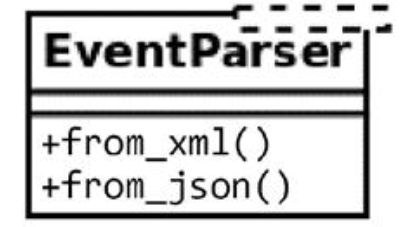

Afin de créer ceci en tant qu'interface en Python, nous utiliserions une classe de base abstraite et définirions les méthodes (from_xml() et from_json()) comme abstraites, pour forcer les classes dérivées à les implémenter. Les événements qui dérivent de cette classe de base abstraite et implémentent ces méthodes pourraient fonctionner avec leurs types correspondants

Mais que se passe-t-il si une classe particulière n'a pas besoin de la méthode XML et ne peut être construite qu'à partir d'un JSON ? Il porterait toujours la méthode from_xml() de l'interface, et puisqu'il n'en a pas besoin, il devra passer. Ceci n'est pas très flexible car cela crée du couplage et oblige les clients de l'interface à travailler avec des méthodes dont ils n'ont pas besoin

## Plus l'interface est petite, mieux c'est. 

Il serait préférable de séparer cela en deux interfaces différentes, une pour chaque méthode. Nous pouvons toujours obtenir la même fonctionnalité en faisant en sorte que notre classe d'analyseur d'événements implémente les deux interfaces (car les interfaces ou les classes de base abstraites ne sont que des classes régulières avec certaines contraintes améliorées, et Python prend en charge l'héritage multiple). La différence maintenant est que chaque méthode est déclarée dans une interface plus spécifique que nous pouvons réutiliser si nous en avons besoin ailleurs dans notre code.

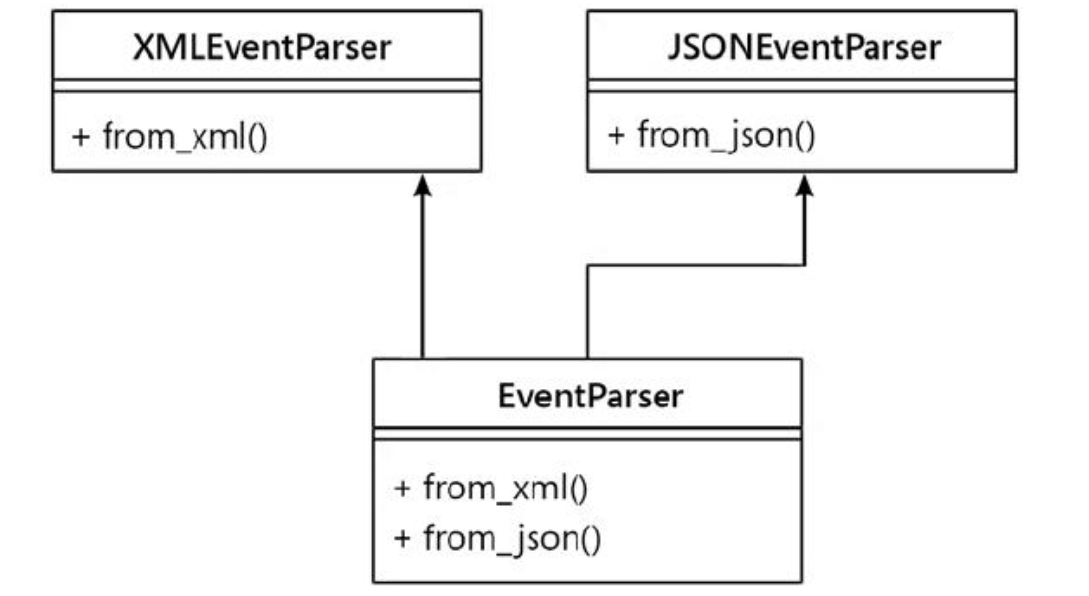

Avec ce design, les objets qui dérivent de XMLEventParser et implémentent la méthode from_xml() sauront se construire à partir d'un XML, et pareil pour un fichier JSON, mais surtout, on maintient l'orthogonalité de deux fonctions indépendantes, et on préserve la flexibilité du système sans perdre aucune fonctionnalité qui peut encore être obtenue en composant de nouveaux objets plus petits

In [ ]:
from abc import ABCMeta, abstractmethod

class XMLEventParser(metaclass=ABCMeta):    
  
  @abstractmethod    
  def from_xml(xml_data: str):        
    """Parse an event from a source in XML representation.""" 
    
class JSONEventParser(metaclass=ABCMeta):    
  
  @abstractmethod    
  def from_json(json_data: str):        
    """Parse an event from a source in JSON format.""" 
    

class EventParser(XMLEventParser, JSONEventParser):    
  """An event parser that can create an event from source data either in XML or JSON format.    
  """ 
  
  def from_xml(xml_data):        
    pass
  
  def from_json(json_data: str):        
    pass

Notez que les méthodes abstraites requises par l'interface doivent être implémentées dans la classe concrète (leur implémentation réelle n'est cependant pas pertinente pour l'exemple). Si nous ne les implémentions pas, une erreur d'exécution se déclencherait, par exemple.

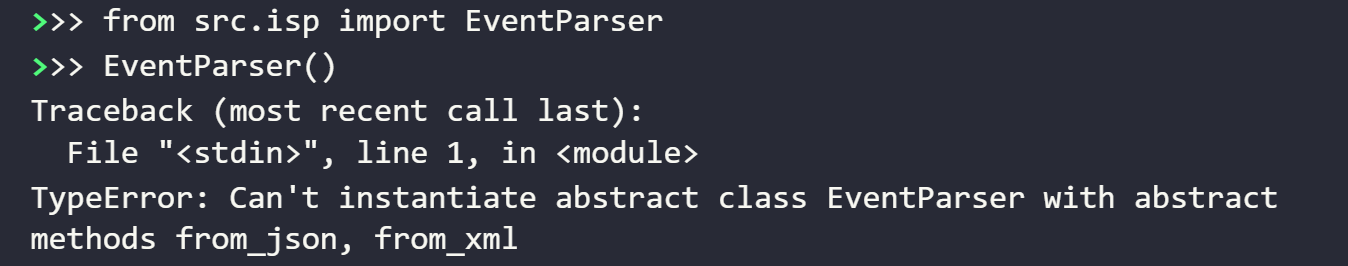

Il y a une certaine ressemblance avec le SRP, mais la principale différence est qu'ici nous parlons d'interfaces, donc c'est une définition abstraite du comportement. Il n'y a aucune raison de changer car il n'y a rien jusqu'à ce que l'interface soit réellement implémentée. Cependant, le non-respect de ce principe créera une interface qui sera couplée à des fonctionnalités orthogonales, et cette classe dérivée ne respectera pas non plus la SRP (elle aura plus d'une raison de changer)

## Quelle doit être la taille d'une interface ? 

Le point soulevé dans la section précédente est valable, mais il nécessite également un avertissement : évitez un chemin dangereux s'il est mal compris ou poussé à l'extrême.

Une classe de base (abstraite ou non) définit une interface pour toutes les autres classes afin de l'étendre. Le fait que cela devrait être aussi petit que possible doit être compris en termes de cohésion - cela devrait faire une chose. Cela ne signifie pas qu'il doit nécessairement avoir une méthode. Dans l'exemple précédent, c'est par coïncidence que les deux méthodes faisaient des choses disjointes ; il était donc logique de les séparer en différentes classes.

Mais il se peut que plusieurs méthodes appartiennent légitimement à la même classe. Imaginez que vous souhaitiez fournir une classe mixin qui résume certaines logiques dans un gestionnaire de contexte afin que toutes les classes dérivées de ce mixin obtiennent gratuitement cette logique de gestionnaire de contexte. Comme nous le savons déjà, un gestionnaire de contexte implique deux méthodes : __enter__ et __exit__. Ils doivent aller ensemble, sinon le résultat ne sera pas du tout un gestionnaire de contexte valide !

Le fait de ne pas placer les deux méthodes dans la même classe entraînera un composant cassé qui est non seulement inutile mais aussi dangereux. Espérons que cet exemple exagéré fonctionne comme un contrepoids à celui de la section précédente, et ensemble, vous pouvez obtenir une image plus précise de la conception d'interfaces

## Inversion de dépendance

C'est une idée très puissante qui reviendra plus tard lorsque nous explorerons certains modèles de conception dans le chapitre 9, Modèles de conception communs, et le chapitre 10, Architecture propre.

Le principe d'inversion de dépendance (DIP) propose un principe de conception intéressant par lequel nous protégeons notre code en le rendant indépendant des éléments fragiles, volatils ou hors de notre contrôle. L'idée d'inverser les dépendances est que notre code ne doit pas s'adapter aux détails ou aux implémentations concrètes, mais plutôt l'inverse : nous voulons forcer n'importe quelle implémentation ou détail à s'adapter à notre code via une sorte d'API.

Les abstractions doivent être organisées de telle manière qu'elles ne dépendent pas des détails, mais plutôt l'inverse : les détails (implémentations concrètes) doivent dépendre des abstractions. Imaginez que deux objets de notre conception doivent collaborer, A et B. A fonctionne avec une instance de B, mais il s'avère que notre module ne contrôle pas B directement (il peut s'agir d'une bibliothèque externe ou d'un module maintenu par une autre équipe, etc.). Si notre code dépend fortement de B, lorsque cela change, le code se cassera. Pour éviter cela, nous devons inverser la dépendance : obliger B à s'adapter à A. Cela se fait en présentant une interface et en forçant notre code à ne pas dépendre de l'implémentation concrète de B, mais plutôt de l'interface que nous avons définie . Il est alors de la responsabilité de B de se conformer à cette interface


Conformément aux concepts explorés dans les sections précédentes, les abstractions se présentent également sous la forme d'interfaces (ou de classes de base abstraites en Python). En général, nous pourrions nous attendre à ce que les implémentations concrètes changent beaucoup plus fréquemment que les composants abstraits. C'est pour cette raison que nous plaçons les abstractions (interfaces) comme des points de flexibilité là où nous nous attendons à ce que notre système change, soit modifié ou étendu sans que l'abstraction elle-même doive être changée.

## Un cas de dépendances rigides

La dernière partie de notre système de surveillance des événements consiste à fournir les événements identifiés à un collecteur de données pour une analyse plus approfondie. Une implémentation naïve d'une telle idée consisterait à avoir une classe de streamer d'événements qui interagit avec une destination de données, par exemple, Syslog :

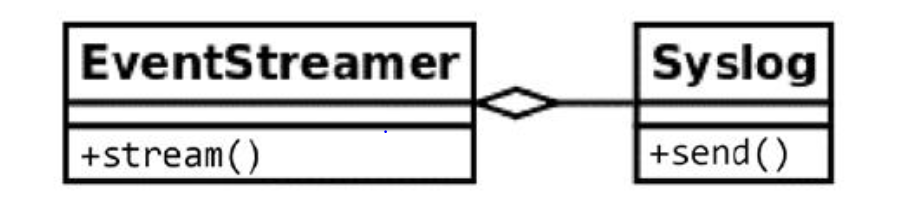

Cependant, cette conception n'est pas très bonne, car nous avons une classe de haut niveau (EventStreamer) dépendant d'une classe de bas niveau (Syslog est un détail d'implémentation). Si quelque chose change dans la façon dont nous voulons envoyer des données à Syslog, EventStreamer devra être modifié. Si nous voulons changer la destination des données pour une autre ou en ajouter de nouvelles lors de l'exécution, nous avons également des problèmes car nous nous retrouverons à modifier constamment la méthode stream() pour l'adapter à ces exigences.

## Inverser les dépendances 

La solution à ces problèmes est de faire fonctionner EventStreamer avec une interface, plutôt qu'avec une classe concrète. Ainsi, l'implémentation de cette interface appartient aux classes de bas niveau qui contiennent les détails d'implémentation :

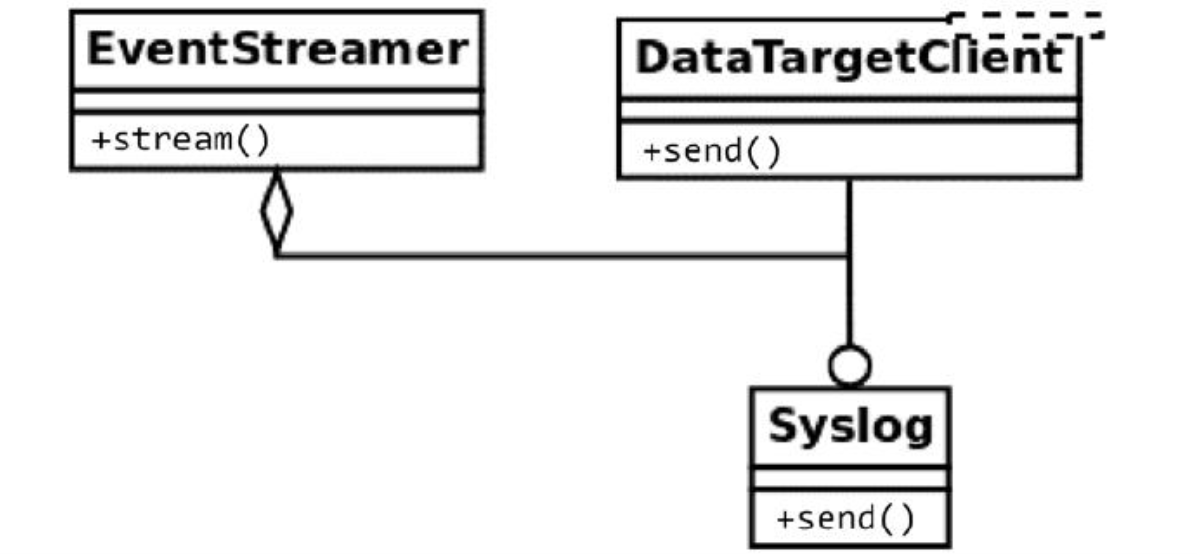

Il existe maintenant une interface qui représente une cible de données générique où les données vont être envoyées. Remarquez comment les dépendances ont maintenant été inversées puisque EventStreamer ne dépend pas d'une implémentation concrète d'une cible de données particulière, il n'a pas à changer en fonction des changements sur celle-ci, et il appartient à chaque cible de données particulière d'implémenter l'interface correctement et s'adapter aux changements si nécessaire.

En d'autres termes, l'EventStreamer original de la première implémentation ne fonctionnait qu'avec des objets de type Syslog, ce qui n'était pas très flexible. Ensuite, nous avons réalisé qu'elle pouvait fonctionner avec n'importe quel objet pouvant répondre à un message .send(), et avons identifié cette méthode comme l'interface à laquelle elle devait se conformer. Maintenant, dans cette version, Syslog étend en fait la classe de base abstraite nommée DataTargetClient, qui définit la méthode send(). Désormais, il appartient à chaque nouveau type de cible de données (email, par exemple) d'étendre cette classe de base abstraite et d'implémenter la méthode send()

Nous pouvons même modifier cette propriété au moment de l'exécution pour tout autre objet qui implémente une méthode send(), et cela fonctionnera toujours. C'est la raison pour laquelle on l'appelle souvent injection de dépendance : parce que la dépendance peut être fournie (injectée) dynamiquement.

Le lecteur avisé pourrait se demander pourquoi cela est nécessaire. Python est assez flexible (parfois trop flexible) et va nous permettre de fournir à un objet comme EventStreamer n'importe quel objet cible de données particulier, sans que celui-ci n'ait à se plier à aucune interface car il est typé dynamiquement. La question est la suivante : pourquoi avons-nous besoin de définir la classe de base abstraite (interface) alors que nous pouvons simplement lui passer un objet avec une méthode send() ?


En toute équité, c'est vrai; il n'est en fait pas nécessaire de le faire, et le programme fonctionnera de la même manière. Après tout, le polymorphisme ne signifie pas (ou n'exige pas) que l'héritage fonctionne. Cependant, définir la classe de base abstraite est une bonne pratique qui présente certains avantages, le premier étant le typage canard. Avec le typage de canard, nous pouvons mentionner le fait que les modèles deviennent plus lisibles - rappelez-vous que l'héritage suit la règle de is a, donc en déclarant la classe de base abstraite et en l'étendant, nous disons que, par exemple, Syslog est DataTargetClient , qui est quelque chose que les utilisateurs de votre code peuvent lire et comprendre (encore une fois, c'est du canard typage). 

Dans l'ensemble, il n'est pas obligatoire de définir la classe de base abstraite, mais c'est souhaitable afin d'obtenir une conception plus propre. C'est l'une des raisons pour lesquelles ce livre est destiné à aider les programmeurs à éviter les erreurs faciles à commettre, simplement parce que Python est trop flexible et que nous pouvons nous en tirer.

## Injection de dépendances

Le concept exploré dans la section précédente nous a donné une idée puissante : au lieu de rendre notre code dépendant d'une implémentation spécifique et concrète, créons une puissante abstraction qui agit comme une couche intermédiaire. 

Dans l'exemple, nous avons expliqué comment dépendre de Syslog conduirait à une conception rigide. Nous avons donc créé une interface pour tous les clients et décidé que Syslog se trouve être l'un d'entre eux, car il implémente l'interface DataTargetClient. Cela ouvre la porte à d'autres clients que nous souhaitons ajouter à l'avenir : créez simplement une nouvelle classe qui implémente l'interface et définit la méthode d'envoi. Le design est maintenant ouvert à l'extension et fermé à la modification (on commence à voir comment les principes s'articulent les uns aux autres). Maintenant, comment serait la collaboration entre ces objets ? Dans cette partie, nous explorons comment la dépendance est fournie à l'objet qui en a réellement besoin.

Une façon de le faire serait de simplement déclarer que le streamer d'événements fonctionne en créant directement l'objet dont il a besoin, dans ce cas un Syslog

In [ ]:
class EventStreamer:    
  
  def __init__(self):        
    
    self._target = Syslog()    
  
  def stream(self, events: list[Event]) -> None:        
    for event in events:            
      self._target.send(event.serialise())

Cependant, ce n'est pas une conception très flexible, et elle ne tire pas pleinement parti de l'interface que nous avons créée. Notez que cette conception est également plus difficile à tester : si vous deviez écrire un test unitaire pour cette classe, vous devriez soit corriger la création de l'objet Syslog, soit le remplacer après sa création. Si le Syslog a des effets secondaires au moment de la création (pas une bonne pratique en général, mais acceptable dans certains cas, par exemple, lorsque vous souhaitez établir une connexion), ces effets secondaires sont également répercutés sur cette initialisation. Il est vrai que cela peut être surmonté en utilisant une propriété paresseuse, mais l'inflexibilité de contrôler réellement l'objet que nous fournissons est toujours là

Une meilleure conception utilisera l'injection de dépendances et laissera la cible être fournie au streamer d'événements :

In [ ]:
class EventStreamer:    
  
  def __init__(self, target: DataTargetClient):        
    self._target = target    
    
  
  def stream(self, events: list[Event]) -> None:        
    for event in events:            
      self._target.send(event.serialise())

Cela utilise l'interface et permet le polymorphisme. Maintenant, nous pouvons passer n'importe quel objet qui implémente cette interface au moment de l'initialisation, et cela rend également plus explicite le fait qu'un streamer d'événements fonctionne avec ce type d'objet. Contrairement au cas précédent, cette version est également plus simple à tester. Si nous ne voulons pas traiter Syslog dans nos tests unitaires, nous pouvons fournir un double de test (juste une nouvelle classe conforme à l'interface et utile pour tout ce que nous devons tester)

Dans certains cas, lorsque les objets ont une initialisation plus compliquée (plus d'arguments), ou qu'ils sont nombreux, il peut être judicieux de déclarer l'interaction entre vos objets dans un graphe de dépendances, puis de laisser une bibliothèque faire le véritable création des objets pour vous (c'est-à-dire pour supprimer le passe-partout du code de colle qui lie différents objets)

Un exemple d'une telle bibliothèque peut être pinject (https://github.com/google/pinject), qui vous permet de déclarer comment les objets interagissent. Dans notre exemple simple, une possibilité serait d'écrire le code comme ceci

In [ ]:
class EventStreamer:    
  
  def __init__(self, target: DataTargetClient):        
    self.target = target    
  
  def stream(self, events: list[Event]) -> None:        
    for event in events:            
      self.target.send(event.serialise())
      
class _EventStreamerBindingSpec(pinject.BindingSpec):    
  def provide_target(self):        
    return Syslog()
    
  
  object_graph = pinject.new_object_graph(    
                              binding_specs=[_EventStreamerBindingSpec()])

Avec la même définition de notre classe que précédemment, nous pouvons définir une spécification de liaison, qui est un objet qui sait comment les dépendances sont injectées. Dans cet objet, toute méthode nommée provide_<dependency> doit renvoyer la dépendance avec ce nom comme suffixe (nous nous sommes contentés de Syslog dans notre exemple simple)